# MODEL GROW AND REMODELING SOFT TISSUE 
**Constrained mixture model (CMM) strech increases linearly with time.**

The theory is taken from Larry Taber "Continuum Modeling in Mechanobiology" (Chapter 7, paragraph 7.4.3.) https://link.springer.com/book/10.1007/978-3-030-43209-6 and law strech
\begin{align*}
    \lambda_x(t) = \hat{\lambda}(1 + at),
\end{align*} 


In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

I denote constants (you can vary them) and create empty arrays for storing data

In [2]:
c_c = 1.0
c_e = 50.0
c_g = 10.0
fi0_c = 0.75
fi0_e = 0.05
fi0_g = 0.20
lambda0_c = 1.05
lambda0_e = 1.10
alpha_c = 0.01
a = 0.1
k_cplus = 1.0
k_cminus = 1.0
k_eplus = 1.0
k_eminus = 1.0
lambda_roof = 1.1
J0 = 1.0
t = 10
n = 1000
gamma = 1.0
time = np.linspace(0, t, n)
result_valc1 = np.zeros(n)
result_valc2 = np.zeros(n)
result_valc3 = np.zeros(n)
result_vale1 = np.zeros(n)
result_vale2 = np.zeros(n)
result_vale3 = np.zeros(n)
result_valg = np.zeros(n)
result_valg1 = np.zeros(n)
result_valg2 = np.zeros(n)
result_val_sigma = np.zeros(n)
result_val_sigma1 = np.zeros(n)
result_val_sigma2 = np.zeros(n)
result_val_sigma3 = np.zeros(n)
result_valc4 = np.zeros(n)
result_vale4 = np.zeros(n)
result_valg3 = np.zeros(n)

result_valj = np.zeros(n)
result_valj1 = np.zeros(n)
result_valj2 = np.zeros(n)
result_valj3 = np.zeros(n)
result_valjc1 = np.zeros(n)
result_valjc2 = np.zeros(n)
result_valjc3 = np.zeros(n)
result_valjc = np.zeros(n)
result_valje = np.zeros(n)
result_valje1 = np.zeros(n)
result_valje2 = np.zeros(n)
result_valje3 = np.zeros(n)
result_valjg = np.zeros(n)
result_valjg1 = np.zeros(n)
result_valjg2 = np.zeros(n)
result_valjg3 = np.zeros(n)

Setting the functions of the model. The following equations are implemented in this script: 
\begin{equation*} 
    \begin{cases}
        &\boldsymbol{\sigma} = \boldsymbol{\sigma}_x^c + \boldsymbol{\sigma}_x^e + \boldsymbol{\sigma}_x^g,\\
        &\displaystyle \boldsymbol{\sigma}_x^c(t) = \frac{J^c(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, 0))q^c(t, 0) + \frac{j^{c+}}{J(t)} \int\limits_0^t \bar{\boldsymbol{\sigma}_x^c}(\lambda_x^{c*}(t, \tau))q^c(t, \tau) d\tau,\\
       &\displaystyle \boldsymbol{\sigma}_x^e(t) = \frac{J^e(0)}{J(0)}\bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, 0))q^e(t, 0) + \frac{j^{e+}}{J(t)} \int\limits_0^t \bar{\boldsymbol{\sigma}_x^e}(\lambda_x^{e*}(t, \tau))q^e(t, \tau) d\tau,\\
       &\displaystyle \boldsymbol{\sigma}_x^g(t) = 2\phi^g c_g\left((\hat{\lambda}(1 + at))^2 - \frac{1}{\hat{\lambda}(1 + at)}\right),\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^c = 4c_c(\lambda_x^{c*})^2[(\lambda_x^{c*})^2 - 1]e^{\alpha_c [(\lambda_x^{c*})^2 - 1]^2},\\
       &\displaystyle \bar{\boldsymbol{\sigma}}_x^e = 4c_e(\lambda_x^{e*})^2[(\lambda_x^{e*})^2 - 1],\\
       &\lambda_x^{c*}(t, \tau) = \lambda_{0}^c \frac{(1 + at)}{(1 + a\tau)}\frac{G_x^c(t)}{G_x^c(\tau)},\\
       &\lambda_x^{e*}(t, \tau) = \lambda_{0}^e \frac{(1 + at)}{(1 + a\tau)}\frac{G_x^e(t)}{G_x^e(\tau)}.
    \end{cases} 
\end{equation*}

In [3]:
Jc0 = fi0_c
Je0 = fi0_e
Jg0 = fi0_g
j_cplus = k_cplus * Jc0 
j_eplus = k_eplus * Je0
def q_c(tay, time):
    return np.exp(-k_cminus*(time-tay))
def q_e(tay, time):
    return np.exp(-k_eminus*(time-tay))
def Q_c(time):
    if k_cminus == 0 and k_cplus == 0:
        return np.exp(-k_cminus*(time))
    else: 
        return np.exp(-k_cminus*(time)) + (k_cplus/k_cminus) * (1.0 - np.exp(-k_cminus*(time)))
def Q_e(time):
    if k_eminus == 0 and k_eplus == 0:
        return np.exp(-k_eminus*(time))
    else:
        return np.exp(-k_eminus*(time)) + (k_eplus/k_eminus) * (1.0 - np.exp(-k_eminus*(time)))
def J_c(time):
    return Jc0 * Q_c(time) 
def J_e(time):
    return Je0 * Q_e(time) 
def J(time):
    return J_c(time) + J_e(time) + Jg0
def Gx_c(time):
    if time == 0:
        return (Jc0)**(1.0/(1.0 + (2.0 * gamma)))
    else:
        return (J_c(time))**(1.0/(1.0 + (2.0 * gamma)))
def Gx_e(time):
    if time == 0:
        return (Je0)**(1.0/(1.0 + (2.0 * gamma)))
    else:
        return (J_e(time))**(1.0/(1.0 + (2.0 * gamma)))
def lambda_cx(tay, time):
        return lambda0_c * ((1 + a * time)/(1 + a * tay)) * ((Gx_c(tay))/(Gx_c(time)))
def lambda_ex(tay, time):
        return lambda0_e * ((1 + a * time)/(1 + a * tay)) * ((Gx_e(tay))/(Gx_e(time)))
def fi_g(time):
    return Jg0/J(time)
def sigma_g(time):
    return 2.0 * c_g * fi_g(time) * ((((lambda_roof * (1 + a * time))** 2.0) - 1.0)/(lambda_roof * (1 + a * time)))
def sigma_c_x_roof(tay, time):
    return 4.0 * c_c * ((lambda_cx(tay, time))**2.0) * (((lambda_cx(tay, time))**2.0) - 1.0) * np.exp(alpha_c * ((((lambda_cx(tay, time))**2.0) - 1.0) ** 2.0))
def sigma_e_x_roof(tay, time):
    return 4.0 * c_e * ((lambda_ex(tay, time))**2.0) * (((lambda_ex(tay, time))**2.0) - 1.0) 
def integral_c(tay, time):
    return sigma_c_x_roof(tay, time) * q_c(tay, time)
def result_int_c(time):
    result = integrate.quad(integral_c, 0, time, args = time)
    return result[0]
def sigma_c(time):
    return Jc0/J(0) * sigma_c_x_roof(0, time) * q_c(0, time) + (((j_cplus)/J(time)) * result_int_c(time)) # if you want to see how the stress will change only during the growth process, then you should comment "result_int_c(time)"
def integral_e(tay, time):
    return sigma_e_x_roof(tay, time) * q_e(tay, time) 
def result_int_e(time):
      resulte = integrate.quad(integral_e, 0, time, args = time)
      return resulte[0]
def sigma_e(time):
    return Je0/J(0) * sigma_e_x_roof(0, time) * q_e(0, time)  + (((j_eplus)/J(time)) * result_int_e(time))# if you want to see how the stress will change only during the growth process, then you should comment "result_int_e(time)"
def sigma_x(time):
    return sigma_c(time) + sigma_e(time) + sigma_g(time)


I am looking at the stress change from the constants of the rate of generation and degradation of collagen fibers, since they are updated about once every 300 days

In [4]:

for i in range(n):
    k_cminus = 1.0
    k_cplus = k_cminus
    j_cplus = k_cplus * Jc0 
    j_eplus = k_eplus * Je0
    result_c = sigma_c(time[i])
    result_valc1[i] = result_c
    result_e = sigma_e(time[i])
    result_vale1[i] = result_e
    result_g = sigma_g(time[i])
    result_valg[i] = result_g
    result_sigma = sigma_x(time[i])
    result_val_sigma[i] = result_sigma
    result_valj[i] = J(time[i])
    result_valjc[i] = J_c(time[i])
    result_valje[i] = J_e(time[i])
    result_valjg[i] = fi0_g
    

In [5]:

for i in range(n):
    k_cplus = 1.0
    k_cminus = 1.5
    j_cplus = k_cplus * Jc0 
    j_eplus = k_eplus * Je0
    result_c1 = sigma_c(time[i])
    result_valc2[i] = result_c1
    result_e1 = sigma_e(time[i])
    result_vale2[i] = result_e1
    result_g1 = sigma_g(time[i])
    result_valg1[i] = result_g1
    result_sigma1 = sigma_x(time[i])
    result_val_sigma1[i] = result_sigma1
    result_valj1[i] = J(time[i])
    result_valjc1[i] = J_c(time[i])
    result_valje1[i] = J_e(time[i])
    result_valjg1[i] = fi0_g


In [6]:

for i in range(n):
    k_cplus = 1.0
    k_cminus = 0.5
    j_cplus = k_cplus * Jc0 
    j_eplus = k_eplus * Je0
    result_c3 = sigma_c(time[i])
    result_valc3[i] = result_c3
    result_e3 = sigma_e(time[i])
    result_vale3[i] = result_e3
    result_g2 = sigma_g(time[i])
    result_valg2[i] = result_g2
    result_sigma2 = sigma_x(time[i])
    result_val_sigma2[i] = result_sigma2
    result_valj2[i] = J(time[i])
    result_valjc2[i] = J_c(time[i])
    result_valje2[i] = J_e(time[i])
    result_valjg2[i] = fi0_g

In [7]:

for i in range(n):
    k_cplus = 1.5
    k_cminus = 1.5
    j_cplus = k_cplus * Jc0 
    j_eplus = k_eplus * Je0
    result_c4 = sigma_c(time[i])
    result_valc4[i] = result_c4
    result_e4 = sigma_e(time[i])
    result_vale4[i] = result_e4
    result_g3 = sigma_g(time[i])
    result_valg3[i] = result_g3
    result_sigma3 = sigma_x(time[i])
    result_val_sigma3[i] = result_sigma3
    result_valj3[i] = J(time[i])
    result_valjc3[i] = J_c(time[i])
    result_valje3[i] = J_e(time[i])
    result_valjg3[i] = fi0_g

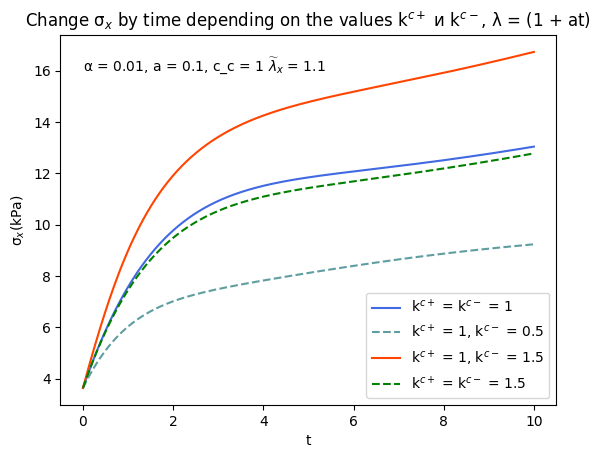

In [8]:

plt.plot(time, result_val_sigma, color = 'royalblue', label = 'k$^{c+}$ = k$^{c-}$ = 1')
plt.plot(time, result_val_sigma2, color = 'cadetblue', linestyle = '--', label = 'k$^{c+}$ = 1, k$^{c-}$ = 0.5')
plt.plot(time, result_val_sigma1, color = 'orangered', label = 'k$^{c+}$ = 1, k$^{c-}$ = 1.5')
plt.plot(time, result_val_sigma3, color = 'green', linestyle = '--', label = 'k$^{c+}$ = k$^{c-}$ = 1.5')
plt.text(0, 16,'α = 0.01, a = 0.1, c_c = 1 $\widetilde{λ}_{x}$ = 1.1')
plt.xlabel('t')
plt.ylabel('σ$_{x}$(kPa)')
plt.title('Change σ$_{x}$ by time depending on the values k$^{c+}$ и k$^{c-}$, λ = (1 + at)')
plt.legend()
plt.show()

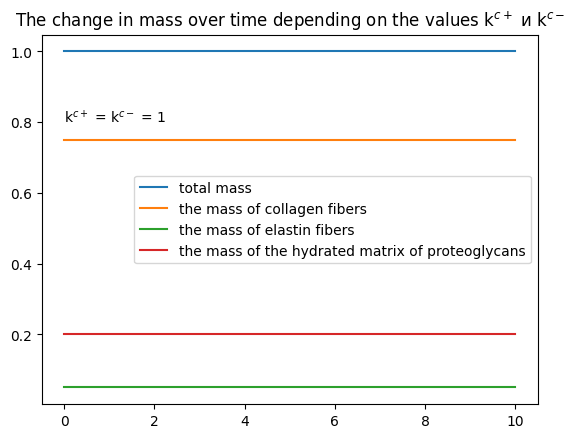

In [9]:
plt.plot(time, result_valj, label = 'total mass')
plt.plot(time, result_valjc, label = 'the mass of collagen fibers')
plt.plot(time, result_valje, label = 'the mass of elastin fibers')
plt.plot(time, result_valjg, label = 'the mass of the hydrated matrix of proteoglycans')
plt.text(0, 0.8,'k$^{c+}$ = k$^{c-}$ = 1')
plt.title('The change in mass over time depending on the values k$^{c+}$ и k$^{c-}$')
plt.legend()
plt.show()

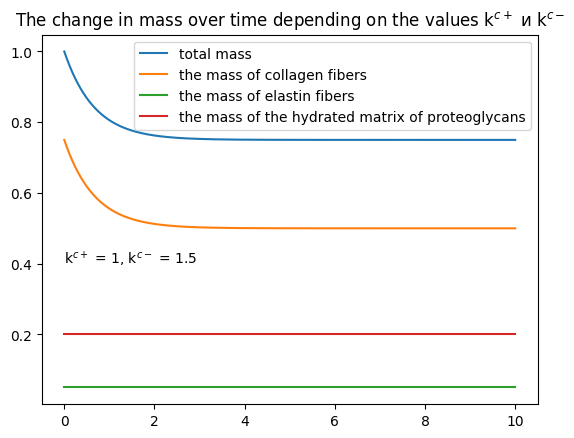

In [10]:
plt.plot(time, result_valj1, label = 'total mass')
plt.plot(time, result_valjc1, label = 'the mass of collagen fibers')
plt.plot(time, result_valje1, label = 'the mass of elastin fibers')
plt.plot(time, result_valjg1, label = 'the mass of the hydrated matrix of proteoglycans')
plt.title('The change in mass over time depending on the values k$^{c+}$ и k$^{c-}$')
plt.text(0, 0.4,'k$^{c+}$ = 1, k$^{c-}$ = 1.5')
plt.legend()
plt.show()

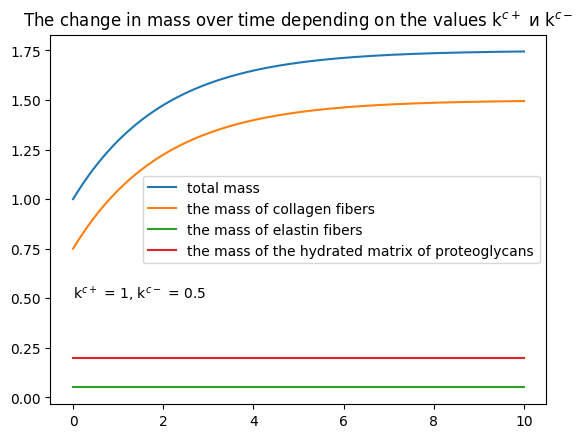

In [11]:
plt.plot(time, result_valj2, label = 'total mass')
plt.plot(time, result_valjc2, label = 'the mass of collagen fibers')
plt.plot(time, result_valje2, label = 'the mass of elastin fibers')
plt.plot(time, result_valjg2, label = 'the mass of the hydrated matrix of proteoglycans')
plt.title('The change in mass over time depending on the values k$^{c+}$ и k$^{c-}$')
plt.text(0, 0.5,'k$^{c+}$ = 1, k$^{c-}$ = 0.5')
plt.legend()
plt.show()

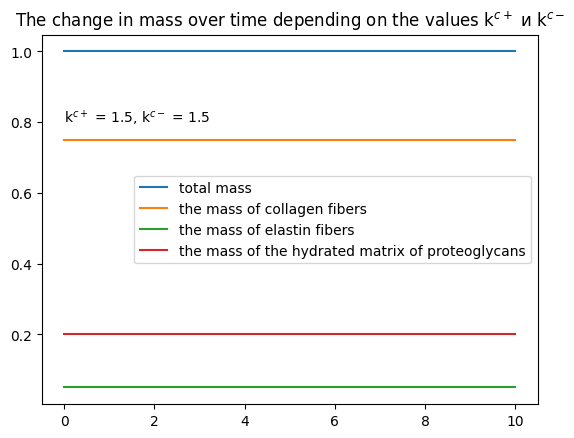

In [12]:
plt.plot(time, result_valj3, label = 'total mass')
plt.plot(time, result_valjc3, label = 'the mass of collagen fibers')
plt.plot(time, result_valje3, label = 'the mass of elastin fibers')
plt.plot(time, result_valjg3, label = 'the mass of the hydrated matrix of proteoglycans')
plt.title('The change in mass over time depending on the values k$^{c+}$ и k$^{c-}$')
plt.text(0, 0.8,'k$^{c+}$ = 1.5, k$^{c-}$ = 1.5')
plt.legend()
plt.show()